In [5]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

path = 'C:\\Users\\Jeff\\Desktop\\Police_Department_Incidents_-_Previous_Year__2016.csv'
df = pd.read_csv(path)

## Informe de crímenes cometidos en San Francisco

De la base de datos https://www.kaggle.com/roshansharma/sanfranciso-crime-dataset

## Evolución del número de crímenes
Inicialmente se va a visualizar cómo ha crecido desde el año 2016 en San Francisco. Esto sería útil para tener una vista general de contexto para los siguientes gráficos.

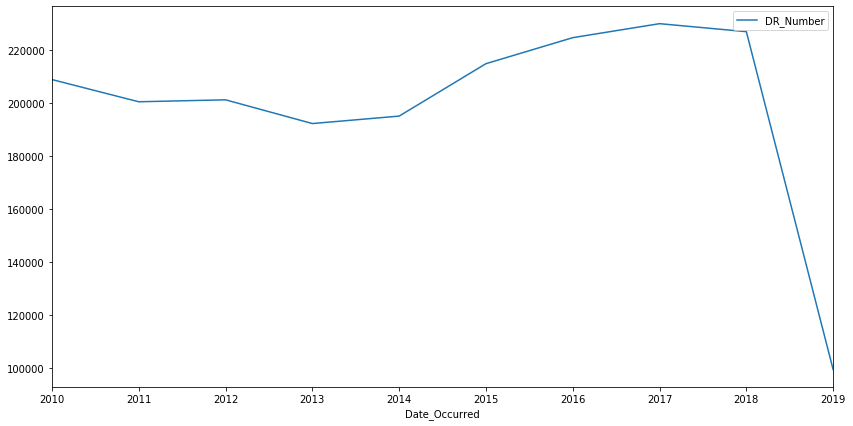

In [6]:
df['Date_Occurred'] = pd.to_datetime(df['Date_Occurred'], format="%Y-%m-%d")

df.Date_Occurred.dt.year

df1 = df.groupby(df.Date_Occurred.dt.year)['DR_Number'].count()

df1.reset_index().plot(kind='line', x='Date_Occurred', y='DR_Number', figsize=(14, 7))

## Número de crímenes hasta el año pasado
La gráfica anterior refleja claramente el hecho de que, del presente año, solo existen datos hasta cierta fecha (Junio en este caso) por lo que para centrarnos de mejor manera en el año que se va a estudiar en este informe, revisaremos la evolución del número de crímenes en el 2019 

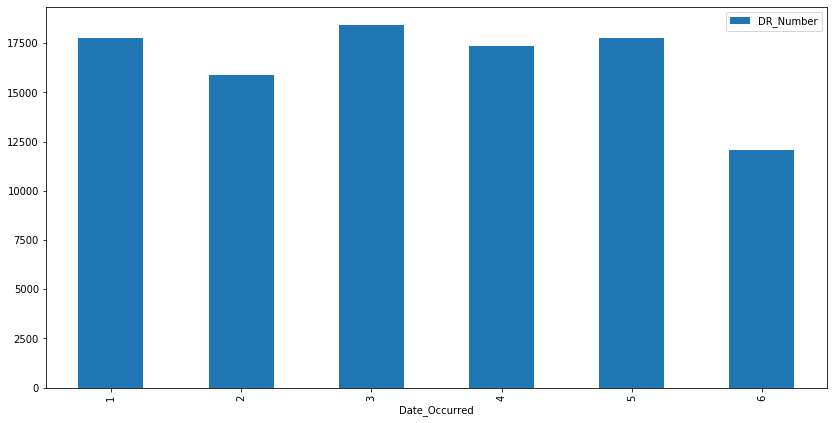

In [7]:
df2019 = df[df.Date_Occurred.dt.year >= 2019]

df2 = df2019.groupby(df.Date_Occurred.dt.month)['DR_Number'].count()

df2.reset_index().plot(kind='bar', x='Date_Occurred', y='DR_Number', figsize=(14, 7))

## El área más peligrosa de San Francisco
Este es útil par alos turistas, el área más peligrosa es la 77th Street

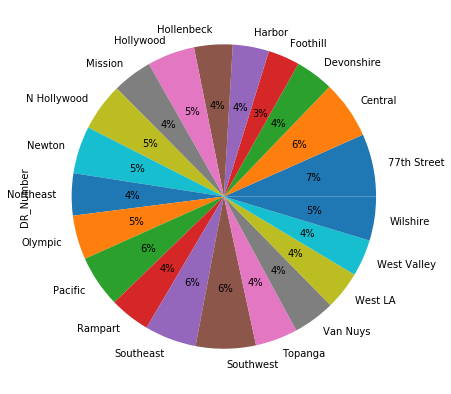

In [9]:
df4 = df2019.groupby(df2019.Area_Name)['DR_Number'].count()

df4.plot.pie(y='DR_Number', figsize=(7, 7), autopct='%1.0f%%')

## El crímen mas frecuente en San Francisco
Esta es una lista de los crímines más frecuentes en San Francisco. que van desde robos hasta secuestros.

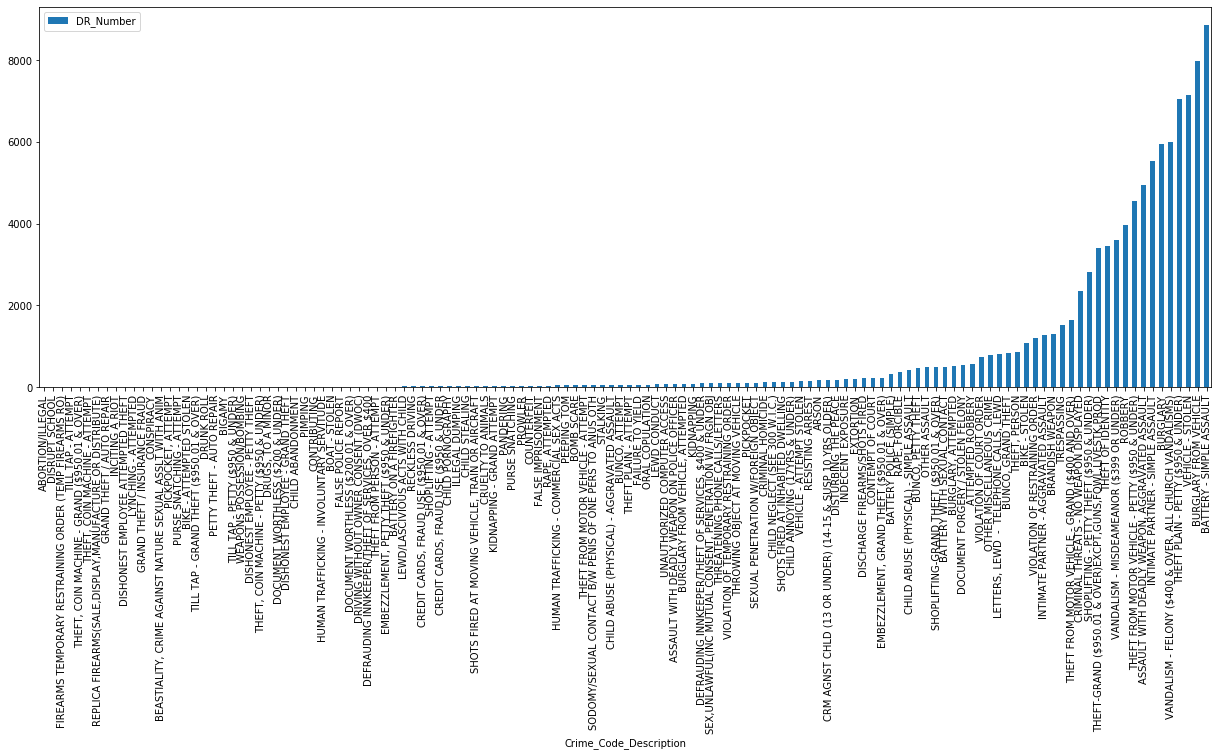

In [38]:
df5 = df2019.groupby(df2019.Crime_Code_Description)['DR_Number'].count().sort_values()

df5.reset_index().plot(kind="bar", x="Crime_Code_Description", y="DR_Number", figsize=(21,7))

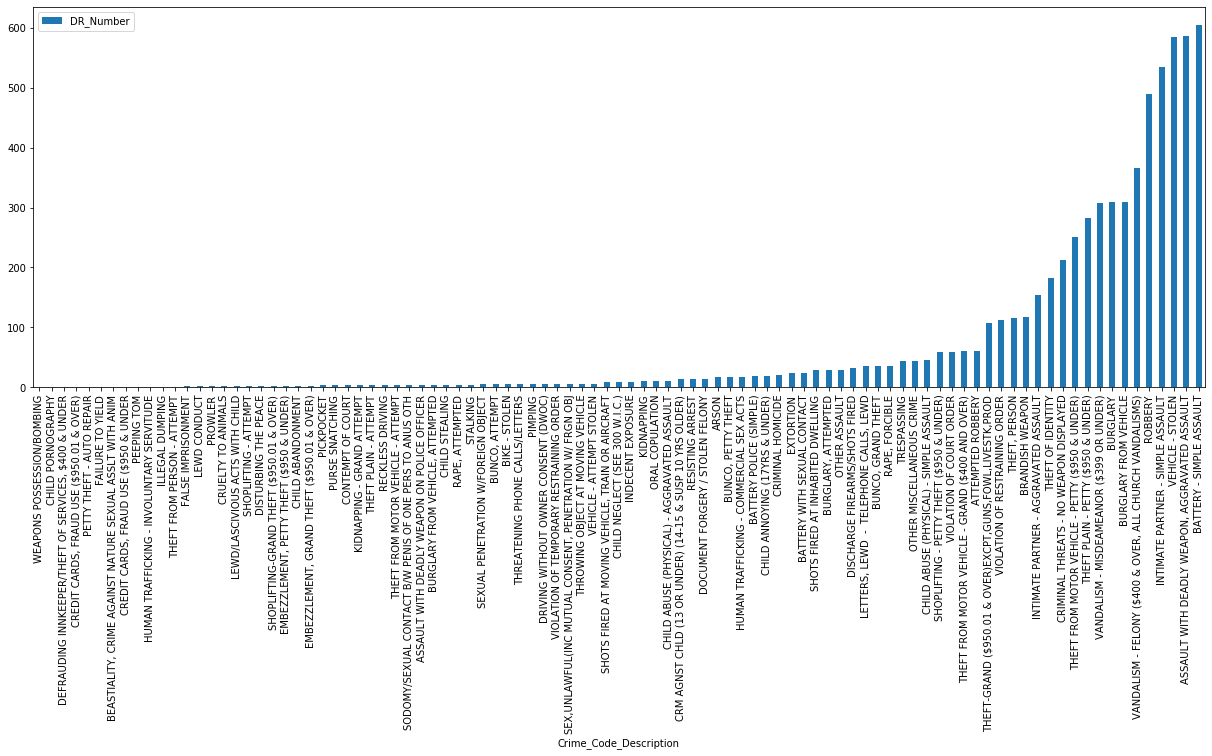

In [40]:
df6 = df2019[df2019.Area_Name == '77th Street'].groupby(df2019.Crime_Code_Description)['DR_Number'].count().sort_values()

df6.reset_index().plot(kind="bar", x="Crime_Code_Description", y="DR_Number", figsize=(21,7))

df7 = df2019[df2019.Area_Name == '77th Street'][df2019.Date_Occurred.dt.month == 3].groupby(df2019.Crime_Code_Description)['DR_Number'].count().sort_values()

df7.reset_index().plot(kind="bar", x="Crime_Code_Description", y="DR_Number", figsize=(21,7))

## Las víctimas
Los crímenes en San Francisco varían en edades, personas, e inclusive razas. 

### Edad
Una comparativa que muestra el número de crímenes por edad.

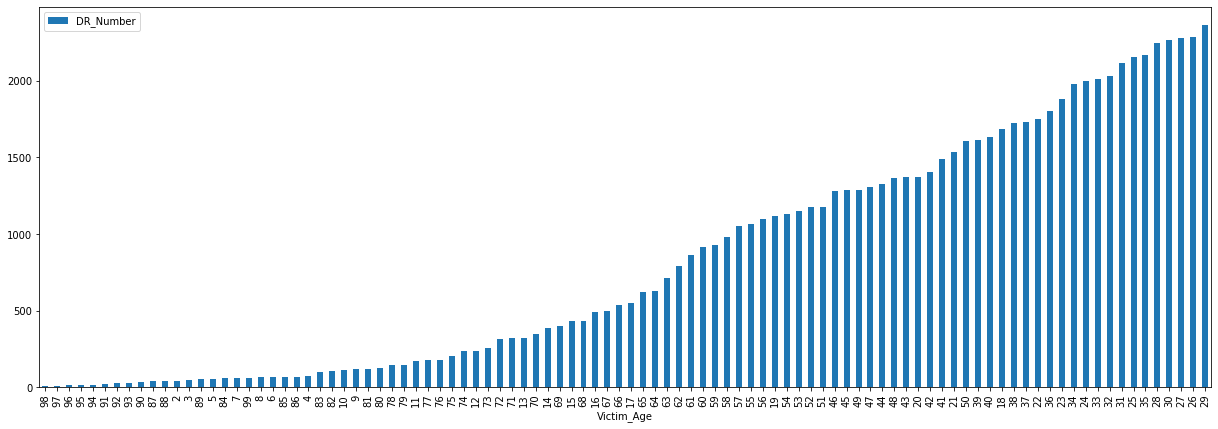

In [60]:
df8 = df2019.groupby(df2019.Victim_Age)['DR_Number'].count().sort_values()

df8.reset_index()[df8.reset_index().Victim_Age != 0].plot(kind="bar", x="Victim_Age", y="DR_Number", figsize=(21,7))

Cuidado con los jovenes

df9 = df8.reset_index()

df9[df9.Victim_Age != 0][df9.Victim_Age < 21].plot(kind="bar", x="Victim_Age", y="DR_Number", figsize=(21,7))

Y el crimen del que más son víctimas

In [ ]:
df10 = df2019[df2019.Victim_Age != 0][df2019.Victim_Age < 21].groupby(df2019.Crime_Code_Description)['DR_Number'].count().sort_values()

df10.plot(kind="bar", x="Crime_Code_Description", y="DR_Number", figsize=(21,7))

### Sexo
Una cuestión de género

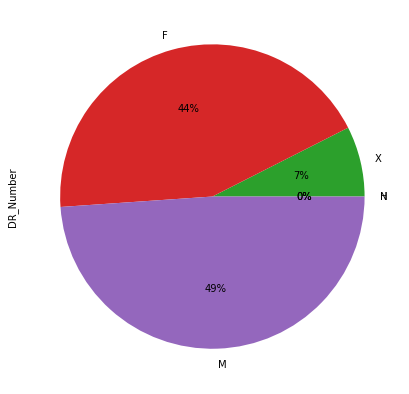

In [68]:
df11 = df2019.groupby(df2019.Victim_Sex)['DR_Number'].count().sort_values()

df11.plot.pie(y='DR_Number', figsize=(7, 7), autopct='%1.0f%%')

Y a nivel de menores de edad

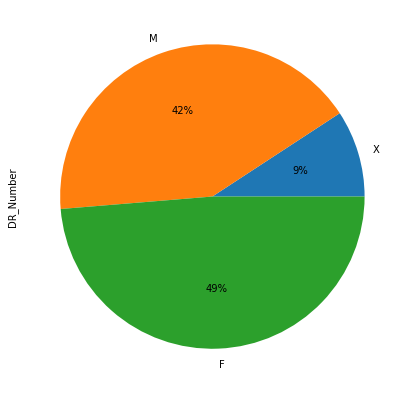

In [69]:
df12 = df2019[df2019.Victim_Age != 0][df2019.Victim_Age < 21].groupby(df2019.Victim_Sex)['DR_Number'].count().sort_values()

df12.plot.pie(y='DR_Number', figsize=(7, 7), autopct='%1.0f%%')

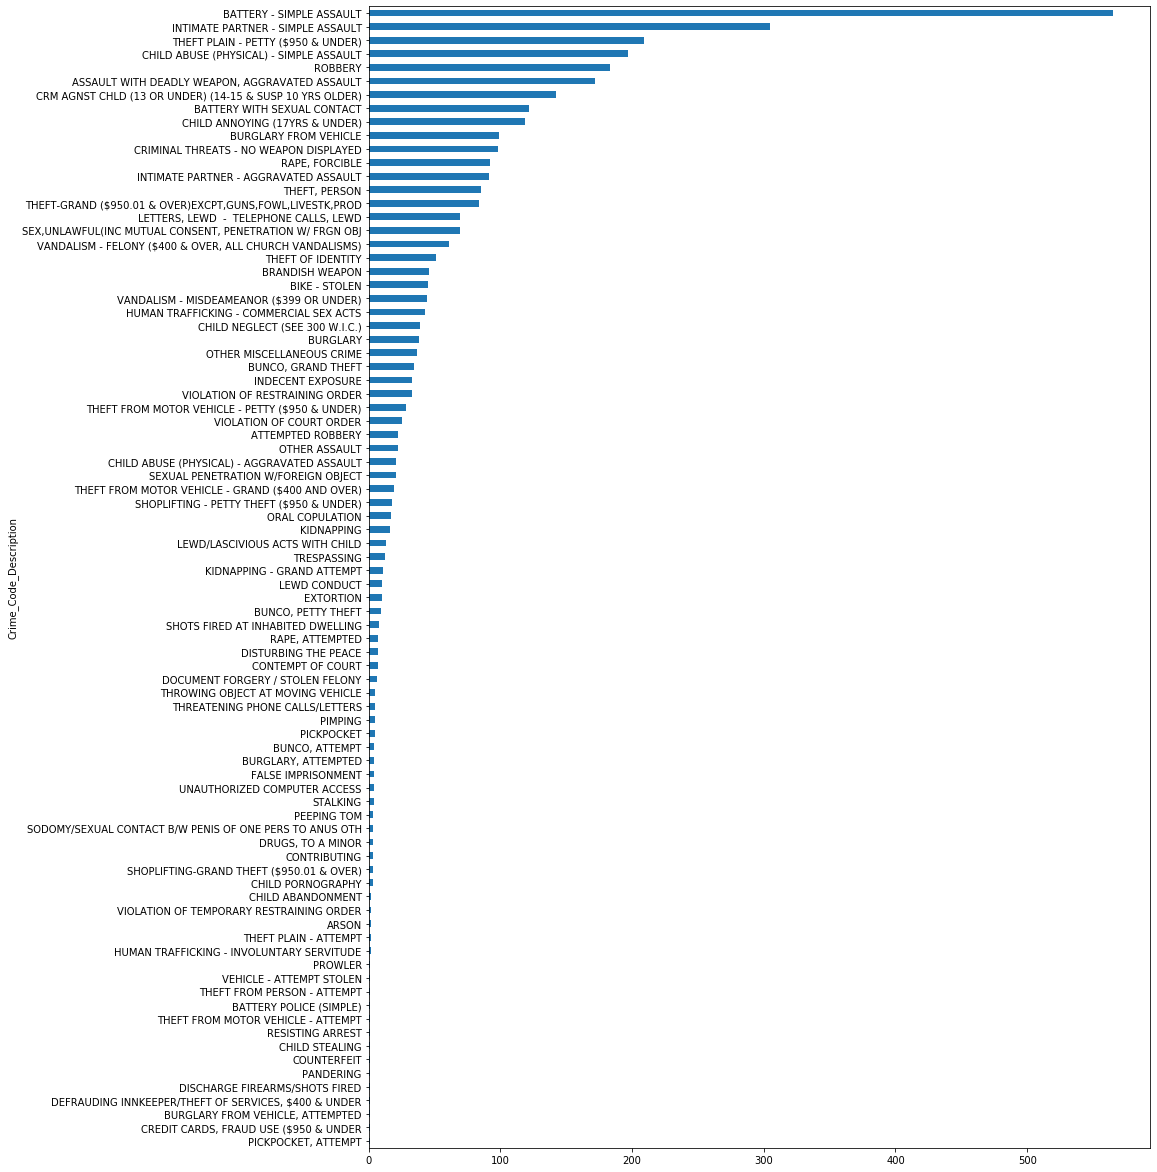

In [80]:
df13 = df2019[df2019.Victim_Age != 0][df2019.Victim_Age < 21][df2019.Victim_Sex == 'F'].groupby(df2019.Crime_Code_Description)['DR_Number'].count().sort_values()

df13.plot(kind="barh", x="Crime_Code_Description", y="DR_Number", figsize=(14,21))

### Descendencia
Descent Code: A - Other Asian B - Black C - Chinese D - Cambodian F - Filipino G - Guamanian H - Hispanic/Latin/Mexican I - American Indian/Alaskan Native J - Japanese K - Korean L - Laotian O - Other P - Pacific Islander S - Samoan U - Hawaiian V - Vietnamese W - White X - Unknown Z - Asian Indian

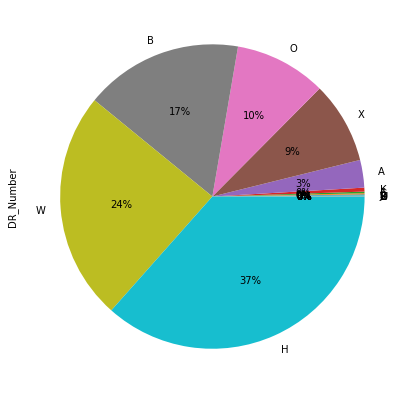

In [84]:
df14 = df2019.groupby(df2019.Victim_Descent)['DR_Number'].count().sort_values()

df14.plot.pie(y='DR_Number', figsize=(7, 7), autopct='%1.0f%%')

## Lugares en donde ocurren los crímenes

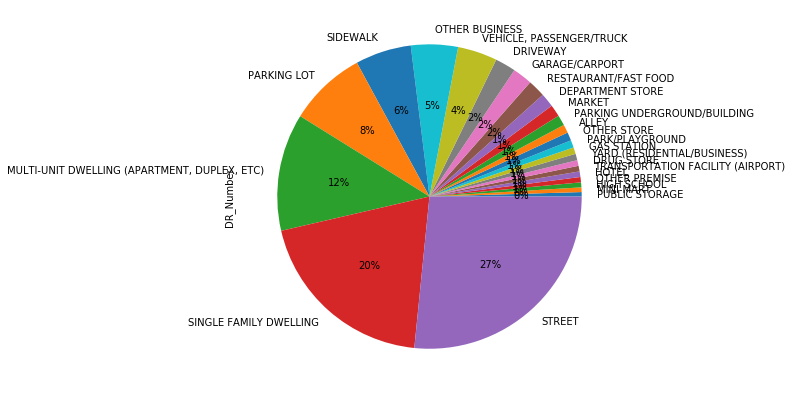

In [120]:
df15 = df2019.groupby(df2019.Premise_Description).count().sort_values(by='DR_Number')

df15[df15.DR_Number > df15.DR_Number.mean()].plot.pie(y='DR_Number', figsize=(42, 7), autopct='%1.0f%%', legend=None)

Los crímenes que más suceden en la calle

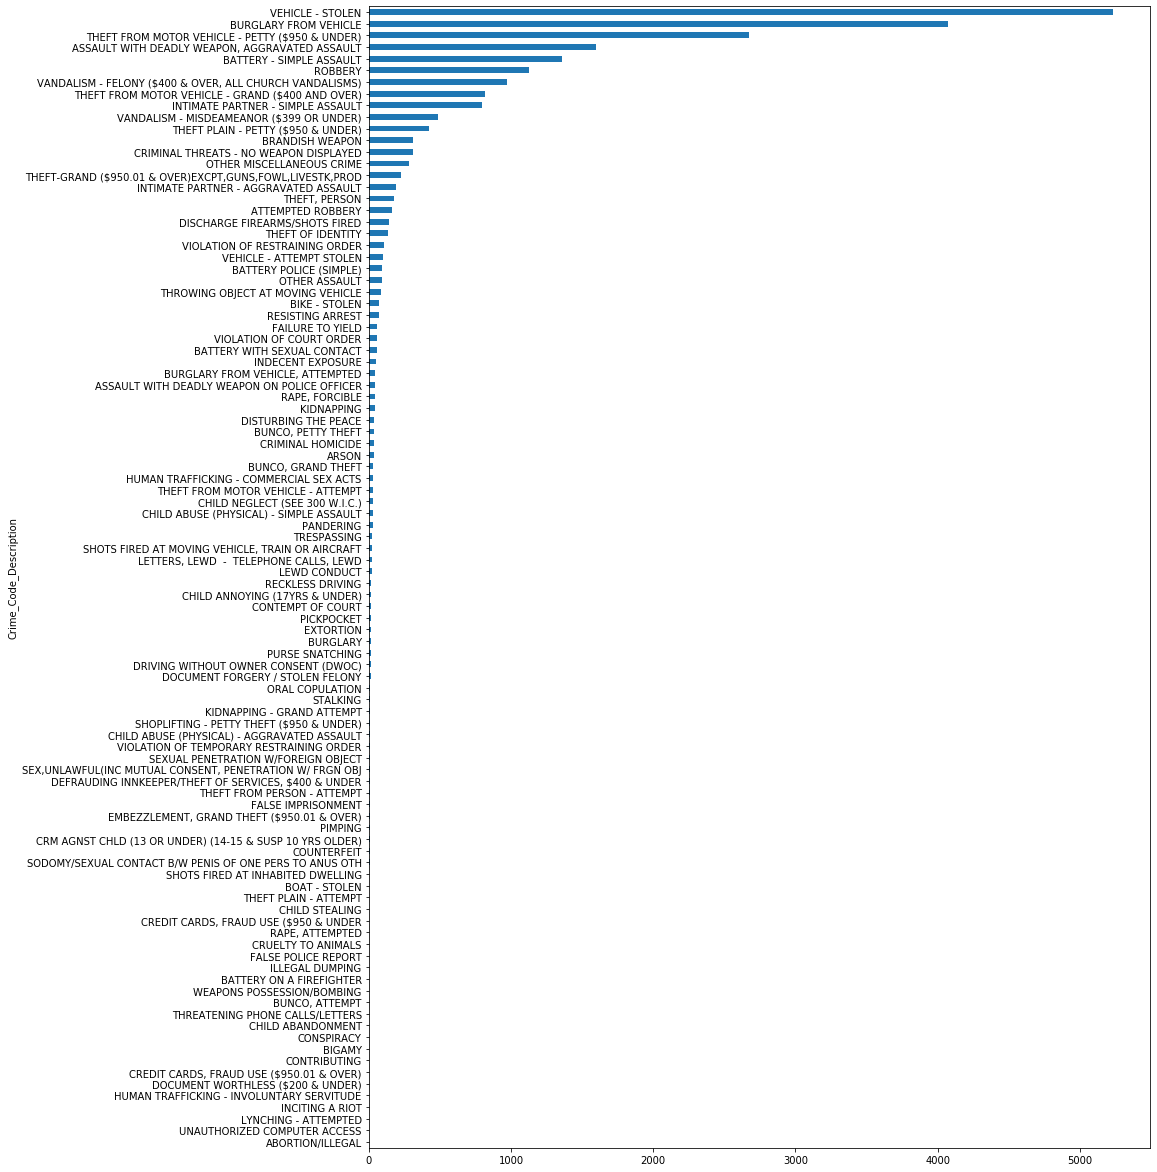

In [118]:
df16 = df2019[df2019.Premise_Description == 'STREET'].groupby(df2019.Crime_Code_Description)['DR_Number'].count().sort_values()

df16.plot(kind="barh", x="Crime_Code_Description", y="DR_Number", figsize=(14,21))